# Getting Started

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display

from input.load import load_df
import analysis

# Preliminary Test

In [23]:
result_summary = pd.read_csv("summary.csv")
test_stability_df = result_summary.loc[139:]
pd.concat([test_stability_df.head(3), test_stability_df.tail(3)])

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
139,2025-06-17 12:22,Variant_13_3,data/run/2025-06-17 12:20/config_13_3.toml,data/result/2025-06-17 12:22_Variant_13_3/loss...,data/result/2025-06-17 12:22_Variant_13_3/val_...,0.268953,-0.003871,0.268925,data/result/2025-06-17 12:22_Variant_13_3/resu...,0:02:16.944426,NaN
140,2025-06-17 12:22,Variant_13_4,data/run/2025-06-17 12:20/config_13_4.toml,data/result/2025-06-17 12:22_Variant_13_4/loss...,data/result/2025-06-17 12:22_Variant_13_4/val_...,0.273671,0.000785,0.273670,data/result/2025-06-17 12:22_Variant_13_4/resu...,0:02:17.307405,NaN
141,2025-06-17 12:22,Variant_1420_4,data/run/2025-06-17 12:20/config_1420_4.toml,data/result/2025-06-17 12:22_Variant_1420_4/lo...,data/result/2025-06-17 12:22_Variant_1420_4/va...,0.436356,0.012894,0.436166,data/result/2025-06-17 12:22_Variant_1420_4/re...,0:02:17.384209,NaN
181,2025-06-17 12:27,Variant_1420_3,data/run/2025-06-17 12:20/config_1420_3.toml,data/result/2025-06-17 12:27_Variant_1420_3/lo...,data/result/2025-06-17 12:27_Variant_1420_3/va...,0.459323,0.032555,0.458168,data/result/2025-06-17 12:27_Variant_1420_3/re...,0:02:25.572783,NaN
182,2025-06-17 12:27,Variant_13_3,data/run/2025-06-17 12:20/config_13_3.toml,data/result/2025-06-17 12:27_Variant_13_3/loss...,data/result/2025-06-17 12:27_Variant_13_3/val_...,0.285144,-0.057462,0.279295,data/result/2025-06-17 12:27_Variant_13_3/resu...,0:02:25.711673,NaN
183,2025-06-17 12:27,Variant_13_1,data/run/2025-06-17 12:20/config_13_1.toml,data/result/2025-06-17 12:27_Variant_13_1/loss...,data/result/2025-06-17 12:27_Variant_13_1/val_...,0.286112,-0.048863,0.281909,data/result/2025-06-17 12:27_Variant_13_1/resu...,0:02:25.823303,NaN


(array([2., 0., 3., 3., 0., 0., 2., 2., 2., 1.]),
 array([0.30143191, 0.30473722, 0.30804253, 0.31134784, 0.31465315,
        0.31795846, 0.32126377, 0.32456908, 0.32787439, 0.3311797 ,
        0.33448501]),
 <BarContainer object of 10 artists>)

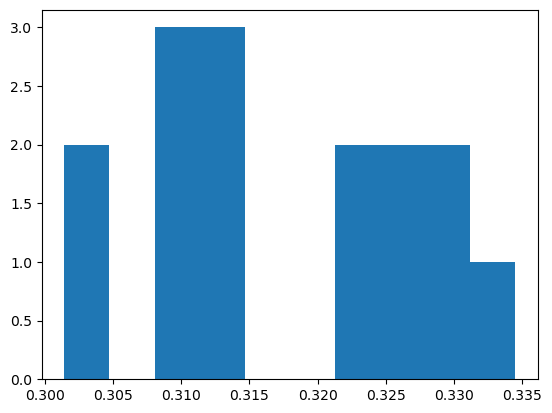

In [21]:
test_stability = {}
for variant in [1, 13, 1420]:
    v_test = test_stability_df[
        test_stability_df["run_name"].str.startswith(f"Variant_{variant}_")
    ]
    rms_dev = v_test["rms_dev"]
    std_diff = v_test["std_diff"]
    test_stability[str(variant)] = {"rms_dev": rms_dev, "std_diff": v_test["std_diff"]}

plt.hist(test_stability["1"]["rms_dev"])

In [2]:
# Load the summary
opt_data_test = pd.read_csv("data/summary/optimum_data_test.csv")

# Extract parameter
opt_data_test["variant_id"] = [
    var_str.split("_")[1] for var_str in opt_data_test["run_name"].values
]
opt_data_test["percent_train_data"] = [
    round(float(var_str.split("_")[2]), 2) * 80
    for var_str in opt_data_test["run_name"].values
]

opt_data_test = opt_data_test.replace([-np.inf, np.inf], [-99, 99])
opt_data_test["percent_train_data"] = opt_data_test["percent_train_data"].round(2)

opt_data_test = opt_data_test[
    [
        "datetime",
        "variant_id",
        "percent_train_data",
        "output_file",
        "rms_dev",
        "mae",
        "std_diff",
        "run_time",
    ]
]
opt_data_test

,datetime,variant_id,percent_train_data,output_file,rms_dev,mae,std_diff,run_time
0,2025-06-17 15:56,2411,4.0,data/result/2025-06-17 15:56_Variant_2411_0.05...,0.384486,-0.004615,0.384459,0:01:32.767520
1,2025-06-17 15:56,2411,9.6,data/result/2025-06-17 15:56_Variant_2411_0.12...,0.308344,0.027265,0.307136,0:02:45.254430
2,2025-06-17 15:56,2411,15.2,data/result/2025-06-17 15:56_Variant_2411_0.19...,0.277486,0.037305,0.274967,0:03:46.080720
3,2025-06-17 15:56,2411,20.0,data/result/2025-06-17 15:56_Variant_2411_0.25...,0.252714,-0.017025,0.252140,0:04:47.489287
4,2025-06-17 15:56,2411,25.6,data/result/2025-06-17 15:56_Variant_2411_0.32...,0.243412,-0.017520,0.242781,0:05:41.312116
...,...,...,...,...,...,...,...,...
1495,2025-06-18 10:43,195,58.4,data/result/2025-06-18 10:43_Variant_195_0.73/...,0.175813,0.003455,0.175779,0:09:49.181442
1496,2025-06-18 10:43,195,64.0,data/result/2025-06-18 10:43_Variant_195_0.80/...,0.189809,0.000140,0.189809,0:10:18.832976
1497,2025-06-18 10:43,195,68.8,data/result/2025-06-18 10:43_Variant_195_0.86/...,0.177340,0.001443,0.177334,0:10:45.793675
1498,2025-06-18 10:43,195,74.4,data/result/2025-06-18 10:43_Variant_195_0.93/...,0.162489,-0.006105,0.162374,0:11:01.680227


(0.0, 1.4874020103185004)

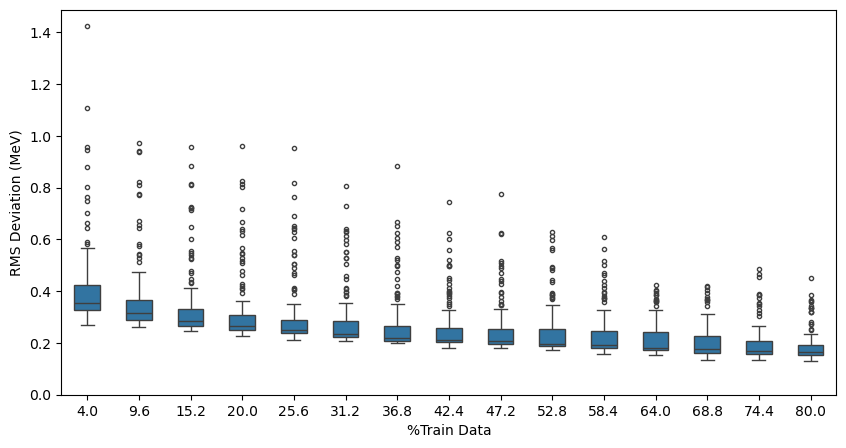

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x="percent_train_data", y="rms_dev", data=opt_data_test, fliersize=3, width=0.5
)

plt.ylabel("RMS Deviation (MeV)")
plt.xlabel("%Train Data")
plt.ylim(bottom=0)

/tmp/ipykernel_23089/3768936449.py:3: FutureWarning: The provided callable <function mean at 0x7f4e70531760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  compact_df = compact_df.groupby("percent_train_data", as_index=False).agg(


4    25.6
Name: percent_train_data, dtype: float64
2    15.2
Name: percent_train_data, dtype: float64


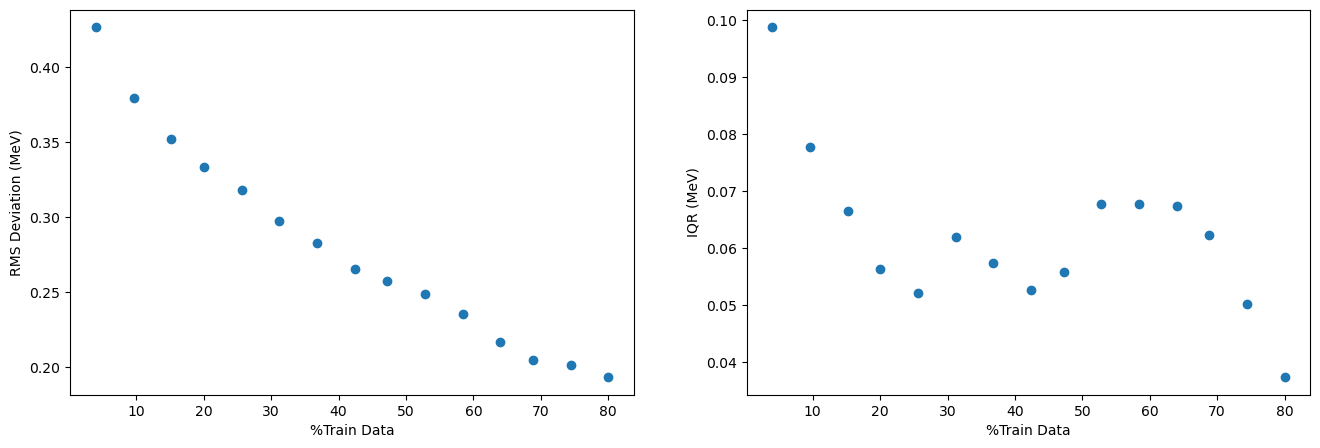

In [50]:
# Groupby
compact_df = opt_data_test[["percent_train_data", "rms_dev"]]
compact_df = compact_df.groupby("percent_train_data", as_index=False).agg(
    mean=("rms_dev", np.mean),
    iqr=("rms_dev", lambda x: x.quantile(0.75) - x.quantile(0.25)),
)

# Determine the optimum
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(compact_df["percent_train_data"], compact_df["mean"])
ax[0].set_xlabel("%Train Data")
ax[0].set_ylabel("RMS Deviation (MeV)")

ax[1].scatter(compact_df["percent_train_data"], compact_df["iqr"])
ax[1].set_xlabel("%Train Data")
ax[1].set_ylabel("IQR (MeV)")


# IC50-like determination
def det_ic50(col):
    val_max = col.max()
    val_min = col.min()

    half_pos = (val_max - val_min) / 2 + val_min
    delta = col.apply(lambda x: x - half_pos)
    lower_than_half = delta[delta < 0]
    higher_than_half = delta[delta > 0]
    first_closest_value = [
        np.abs(lower_than_half.iloc[0]),
        np.abs(higher_than_half.iloc[-1]),
    ]

    return delta.index[delta.abs() == min(first_closest_value)]


print(compact_df.loc[det_ic50(compact_df["mean"])]["percent_train_data"])
print(compact_df.loc[det_ic50(compact_df["iqr"])]["percent_train_data"])

# Full-scale Simulation

In [2]:
full_result = pd.read_csv("data/summary/full_scale.csv")
full_result["variant_id"] = full_result["run_name"].str.split("_").str[1].astype(int)
full_result["run_time"] = pd.to_timedelta(full_result["run_time"])
full_result.tail(3)

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note,variant_id
11019,2025-06-22 17:33,variant_11018,data/run/2025-06-19 16:33/variant_11018.toml,data/result/2025-06-22 17:33_variant_11018/los...,data/result/2025-06-22 17:33_variant_11018/val...,0.277530,0.005457,0.277476,data/result/2025-06-22 17:33_variant_11018/res...,0 days 00:04:48.243701,NaN,11018
11020,2025-06-22 17:33,variant_11013,data/run/2025-06-19 16:33/variant_11013.toml,data/result/2025-06-22 17:33_variant_11013/los...,data/result/2025-06-22 17:33_variant_11013/val...,0.420675,-0.010315,0.420549,data/result/2025-06-22 17:33_variant_11013/res...,0 days 00:04:48.382030,NaN,11013
11021,2025-06-22 17:33,variant_11020,data/run/2025-06-19 16:33/variant_11020.toml,data/result/2025-06-22 17:33_variant_11020/los...,data/result/2025-06-22 17:33_variant_11020/val...,0.225230,-0.012450,0.224886,data/result/2025-06-22 17:33_variant_11020/res...,0 days 00:04:48.491651,NaN,11020


## Global variable test

In [8]:
# Dataset preparation
full_result["moment"] = full_result.apply(analysis.dataset.extract_result, axis=1)
moment_df = pd.concat(
    [full_result["variant_id"], full_result["moment"].apply(pd.Series)], axis=1
)
moment_df.insert(2, "r_std", moment_df["ml_std"] / moment_df["variant_std"])
moment_df.insert(3, "drms", moment_df["ml_rms"] - moment_df["variant_rms"])
display(moment_df)

# Correlation test
target_columns = ["variant_rms", "variant_mean", "variant_std", "variant_skew"]
result_columns = ["rms_dev", "r_std", "drms", "ml_rms", "ml_mean", "ml_std", "ml_skew"]

corr_matrix = pd.DataFrame(index=target_columns, columns=result_columns, dtype=float)

for index in target_columns:
    for column in result_columns:
        corr = moment_df[[index, column]].corr(method="spearman").iloc[0, 1]
        corr_matrix.loc[index, column] = round(corr, 3)

display(corr_matrix)

,variant_id,rms_dev,r_std,drms,variant_rms,variant_mean,variant_std,variant_skew,ml_rms,ml_mean,ml_std,ml_skew
0,1,0.257093,0.920851,-0.032310,0.441481,0.115100,0.426246,-1.520802,0.409172,0.115679,0.392510,-1.219481
1,11,0.255597,0.981874,-0.005700,0.848391,-0.631821,0.566233,-1.348822,0.842691,-0.633305,0.555969,-1.310836
2,2,0.253046,0.988292,0.000019,0.879666,0.638154,0.605498,0.358254,0.879685,0.644832,0.598410,0.475432
3,4,0.255758,0.999723,-0.001261,0.803083,-0.475478,0.647246,-1.004990,0.801821,-0.473590,0.647067,-0.955134
4,3,0.254481,0.967470,-0.015069,0.506061,0.263608,0.432015,-0.962950,0.490991,0.257697,0.417962,-0.719795
...,...,...,...,...,...,...,...,...,...,...,...,...
11017,11011,0.243944,0.872394,-0.028935,0.753208,0.629147,0.414153,0.025799,0.724273,0.627734,0.361305,-0.449961
11018,11015,0.220236,0.969598,-0.014479,1.170394,-0.936801,0.701643,-1.070403,1.155915,-0.934552,0.680312,-0.892688
11019,11018,0.277530,0.908848,-0.034897,0.902588,0.709908,0.557445,0.884777,0.867691,0.704451,0.506633,-0.075572
11020,11013,0.420675,0.865382,-0.112254,0.833142,-0.067556,0.830463,5.386369,0.720888,-0.057241,0.718668,-0.567942


,rms_dev,r_std,drms,ml_rms,ml_mean,ml_std,ml_skew
variant_rms,0.267,0.369,0.124,0.968,-0.129,0.904,0.339
variant_mean,-0.047,-0.012,0.018,-0.129,1.000,-0.073,0.531
variant_std,0.379,0.329,0.027,0.875,-0.071,0.942,0.445
variant_skew,0.673,-0.161,-0.322,0.311,0.290,0.398,0.741


Text(0.5, 0, 'RMS Dev (MeV)')

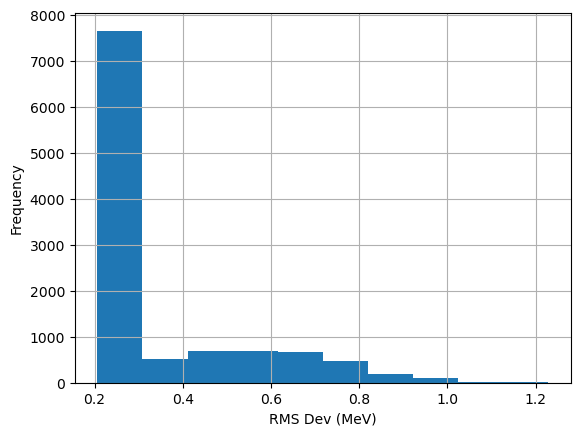

In [6]:
moment_df["rms_dev"].hist()
plt.ylabel("Frequency")
plt.xlabel("RMS Dev (MeV)")

## Nuclear landscape analysis

In [ ]:
# calculate epsilon
# make epsilon and uncertainty plot
# make mae and r_std plot correlation plot

## Skyrme Parameter

In [19]:
# Load skyrme param
skyrme_param, _ = load_df("variant", "ext")
skyrme_param = pd.concat(
    [skyrme_param["varian_id"], skyrme_param.iloc[:, 2:23]], axis=1
)
skyrme_param.rename(columns={"varian_id": "variant_id"}, inplace=True)

# Set x_2 to t_2.x_2
skyrme_param["param(09)"] = skyrme_param["param(09)"] * skyrme_param["param(03)"]

# Set param to relative param i.e. (param_variant - param_bsk)
skyrme_param.iloc[:, 1:] = skyrme_param.apply(
    analysis.dataset.relative_skyrme, axis=1, result_type="expand"
)

moment_n_skyrme = pd.merge(
    moment_df[["variant_id", "rms_dev", "variant_rms", "ml_rms"]],
    skyrme_param,
    on="variant_id",
    how="inner",
)
display(moment_n_skyrme)

# Correlation test
target_columns = ["rms_dev", "variant_rms", "ml_rms"]
result_columns = [col for col in moment_n_skyrme.columns if col.startswith("param")]

corr_matrix = pd.DataFrame(index=target_columns, columns=result_columns, dtype=float)

for index in target_columns:
    for column in result_columns:
        corr = moment_n_skyrme[[index, column]].corr(method="spearman").iloc[0, 1]
        corr_matrix.loc[index, column] = round(corr, 3)

display(corr_matrix)

,variant_id,rms_dev,variant_rms,ml_rms,param(01),param(02),param(03),param(04),param(05),param(06),...,param(12),param(13),param(14),param(15),param(16),param(17),param(18),param(19),param(20),param(21)
0,1,0.257093,0.441481,0.409172,-0.041,0.0918,0.00001,0.29,-0.16830,0.0008,...,-0.00026,9.676667e-06,-0.000020,-2.113333e-06,-0.2826,-0.002769,0.003492,-0.033362,-0.101921,-0.808
1,11,0.255597,0.848391,0.842691,-0.033,-0.0386,0.00001,-0.09,0.05515,-0.0040,...,0.00028,7.466667e-07,0.000914,-1.633333e-06,-0.0573,0.008832,-0.035606,-0.015897,-0.095636,-0.104
2,2,0.253046,0.879666,0.879685,0.004,-0.0821,0.00001,0.07,-0.12860,0.0015,...,-0.00036,4.026667e-06,0.000494,-7.233333e-07,-0.1229,-0.013142,-0.014653,-0.030643,-0.094531,-0.179
3,4,0.255758,0.803083,0.801821,0.063,0.0201,0.00001,0.28,-0.01640,0.0107,...,0.00018,6.836667e-06,0.000855,-6.323333e-06,-0.4356,-0.004323,0.012980,-0.051772,-0.061594,-0.655
4,3,0.254481,0.506061,0.490991,-0.014,0.1544,0.00001,0.20,-0.24120,0.0031,...,0.00004,2.166667e-06,0.002664,1.253667e-05,0.0054,0.001508,-0.021386,-0.047252,-0.099283,-0.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,11011,0.243944,0.753208,0.724273,0.066,0.0537,0.00001,-0.29,0.00088,-0.0087,...,0.00030,4.186667e-06,0.001586,-3.213333e-06,-0.2093,0.008880,-0.026861,-0.048634,-0.123645,-0.433
11018,11015,0.220236,1.170394,1.155915,-0.016,-0.0449,0.00001,0.14,-0.23290,0.0005,...,-0.00015,-7.933333e-07,0.000949,5.186667e-06,-0.1970,0.002360,-0.010912,-0.063131,-0.103329,-0.175
11019,11018,0.277530,0.902588,0.867691,-0.007,-0.0595,0.00001,0.16,0.40153,0.0007,...,-0.00011,-4.333333e-07,-0.000434,-2.188333e-05,-0.5553,-0.004147,-0.003332,-0.025941,-0.140685,-0.753
11020,11013,0.420675,0.833142,0.720888,-0.009,-0.0332,0.00001,0.76,0.16638,0.0027,...,-0.00068,9.906667e-06,-0.001023,2.307667e-05,-0.0985,-0.000747,-0.009989,-0.053318,-0.135594,-0.306


,param(01),param(02),param(03),param(04),param(05),param(06),param(07),param(08),param(09),param(10),...,param(12),param(13),param(14),param(15),param(16),param(17),param(18),param(19),param(20),param(21)
rms_dev,-0.028,-0.049,0.023,-0.037,-0.028,0.034,-0.028,0.032,-0.030,0.011,...,0.043,0.021,-0.017,0.032,0.057,-0.068,-0.331,0.052,-0.532,0.037
variant_rms,-0.015,-0.021,0.019,-0.006,-0.018,0.022,-0.033,0.049,-0.023,0.030,...,0.023,-0.002,-0.021,-0.000,0.005,-0.053,-0.120,0.006,-0.194,-0.004
ml_rms,-0.009,-0.011,0.010,0.001,-0.012,0.018,-0.032,0.047,-0.013,0.030,...,0.017,-0.007,-0.017,-0.004,-0.004,-0.041,-0.063,0.005,-0.106,-0.001


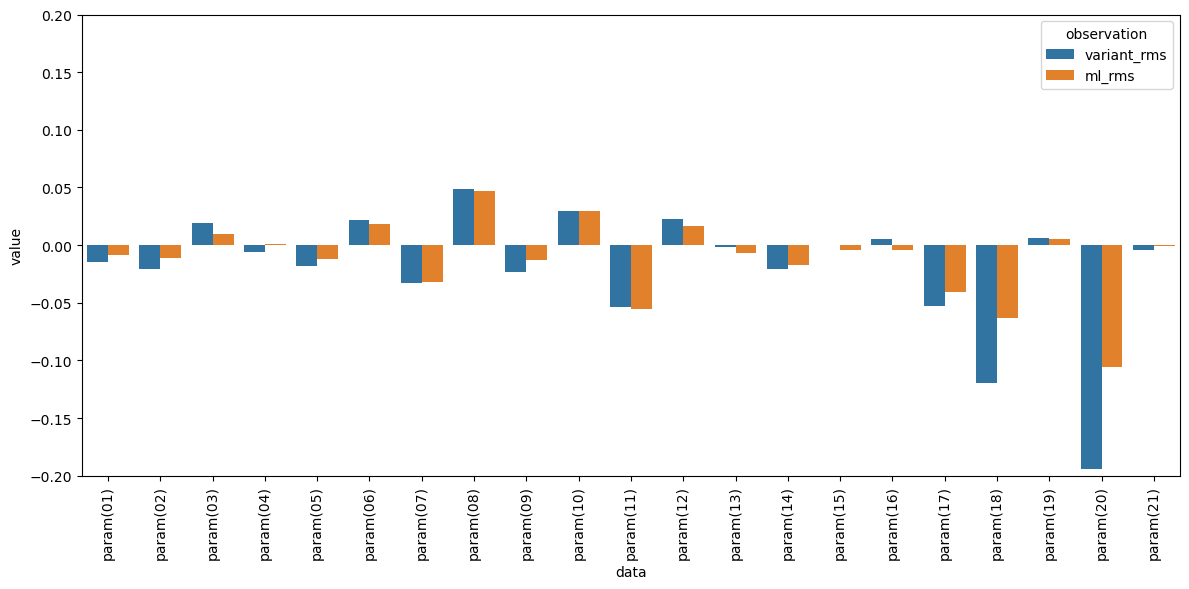

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure
# df = pd.DataFrame(...)

# Assume your DataFrame looks like this:
# Rows: observations
# Columns: data_01 to data_21
# Optional: index is already labeled with observation names

df = corr_matrix.iloc[1:, :]
# Reshape the DataFrame from wide → long (for plotting)
df_long = df.reset_index().melt(id_vars="index", var_name="data", value_name="value")
df_long = df_long.rename(columns={"index": "observation"})

# Plot
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="data", y="value", hue="observation")

plt.xticks(rotation=90)
plt.ylim(-0.2, 0.2)
plt.tight_layout()
plt.show()